In [61]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from statsmodels.formula.api import ols
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
pd.set_option('display.max_colwidth',1000)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('violent_crime.csv')

In [3]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

In [4]:
df

,case_number,date,block,primary_type,unique_id,zip_code,ward,community_area,street_outreach_organization,area,district,beat,age,sex,race,fbi_cd,fbi_descr,iucr_cd,iucr_secondary,month,day_of_week,hour,latitude,longitude,location
0,HZ100096,01/01/2016 02:04:00 AM,4600 S ST LAWRENCE,FATAL SHOOTING,HOM-HZ100096-1,60653,4,GRAND BOULEVARD,None,1,2,221,20 - 29,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,2,41.810127,-87.611604,POINT (-87.611604058699 41.810126904142)
1,HZ100342,01/01/2016 06:39:00 AM,1900 W GARFIELD BLVD,FATAL SHOOTING,HOM-HZ100342-1,60609,16,NEW CITY,PBMR New City,1,9,932,30 - 39,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,6,41.794218,-87.673175,POINT (-87.67317465388 41.794218345858)
2,HZ101042,01/01/2016 10:06:00 PM,6100 S SANGAMON ST,FATAL SHOOTING,HOM-HZ101042-1,60621,16,ENGLEWOOD,TADC Englewood | READI 60621,1,7,712,30 - 39,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,22,41.782338,-87.647905,POINT (-87.64790465388 41.782338345858)
3,HZ101842,01/02/2016 04:40:00 PM,6300 S STONY ISLAND,FATAL SHOOTING,HOM-HZ101842-1,60637,20,WOODLAWN,Project H.O.O.D. Woodlawn,1,3,314,0 - 19,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,7,16,41.780618,-87.586165,POINT (-87.58616465388 41.780618345858)
4,HZ103309,01/04/2016 08:22:00 AM,400 N CENTRAL AVE,FATAL SHOOTING,HOM-HZ103309-1,60644,37,AUSTIN,READI 60644 | INVC Austin,4,15,1523,20 - 29,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,2,8,41.888383,-87.765249,POINT (-87.765249058699 41.888383095858)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20031,JE266314,06/14/2021 10:32:00 PM,7300 S MOZART ST,NON-FATAL SHOOTING,SHOOT-JE266314-1,60629,18,CHICAGO LAWN,None,1,8,835,20 - 29,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED - HANDGUN,6,2,22,41.760197,-87.694021,POINT (-87.694020941301 41.760196904142)
20032,JE289151,07/03/2021 11:49:00 PM,1000 W 89TH ST,NON-FATAL SHOOTING,SHOOT-JE289151-1,60620,21,AUBURN GRESHAM,Acclivus Washington Heights,2,22,2222,40 - 49,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED - HANDGUN,7,7,23,41.733063,-87.649051,POINT (-87.649050941301 41.733063095858)
20033,JE290206,07/04/2021 10:44:00 PM,3000 E 79TH PL,NON-FATAL SHOOTING,SHOOT-JE290206-1,60617,7,SOUTH CHICAGO,Claretian Associates South Chicago,2,4,422,40 - 49,M,BLK,04B,AGGRAVATED BATTERY (INDEX),041A,AGGRAVATED - HANDGUN,7,1,22,41.750657,-87.550559,POINT (-87.550559058699 41.750656904142)
20034,JE292814,07/06/2021 10:36:00 PM,12100 S DOTY AVE,FATAL SHOOTING,HOM-JE292814-1,60628,9,RIVERDALE,None,2,5,532,0 - 19,M,BLK,00,NON-CRIMINAL,5078,INVESTIGATION,7,3,22,41.673107,-87.600781,POINT (-87.600780941301 41.673106904142)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20036 entries, 0 to 20035
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   case_number                   20036 non-null  object 
 1   date                          20036 non-null  object 
 2   block                         20036 non-null  object 
 3   primary_type                  20036 non-null  object 
 4   unique_id                     20036 non-null  object 
 5   zip_code                      20036 non-null  int64  
 6   ward                          20036 non-null  int64  
 7   community_area                20036 non-null  object 
 8   street_outreach_organization  20036 non-null  object 
 9   area                          20036 non-null  int64  
 10  district                      20036 non-null  int64  
 11  beat                          20036 non-null  int64  
 12  age                           19801 non-null  object 
 13  s

In [6]:
df['age'].fillna('UNKNOWN', inplace=True)
df['sex'].fillna('UNKNOWN', inplace=True)
df['race'].fillna('(NOT PROVIDED)', inplace=True)

In [7]:
df['iucr_secondary'].replace(' -', ':', inplace=True, regex=True)
df['sex'].replace(['UNKNOWN','X', '(NOT PROVIDED)'], 'SEX_UNKNOWN', inplace=True)

In [8]:
df['sex'].unique()

array(['M', 'F', 'SEX_UNKNOWN'], dtype=object)

In [9]:
df['iucr_secondary'].value_counts()

AGGRAVATED: HANDGUN                           15415
FIRST DEGREE MURDER                            3599
ARMED: HANDGUN                                  376
ATTEMPT: ARMED-HANDGUN                          192
AGGRAVATED: OTHER FIREARM                       123
AGGRAVATED DOMESTIC BATTERY: HANDGUN             92
ATTEMPT ARMED: HANDGUN                           86
SECOND DEGREE MURDER                             38
AGGRAVATED VEHICULAR HIJACKING                   31
AGGRAVATED POLICE OFFICER: HANDGUN               21
AGGRAVATED PO: HANDGUN                           18
AGGRAVATED                                        8
INVESTIGATION                                     5
VEHICULAR HIJACKING                               4
ATTEMPT AGGRAVATED                                4
AGGRAVATED POLICE OFFICER: OTHER FIREARM          3
ATTEMPT: AGGRAVATED                               3
ARMED: OTHER FIREARM                              3
ATTEMPT ARMED: OTHER FIREARM                      3
ATTEMPT: ARM

In [10]:
def help_available(string):
    if string == 'None':
        return 'no'
    else:
        return 'yes'

In [11]:
df['so_yes_no'] = df['street_outreach_organization'].map(help_available)
df['so_yes_no']

0         no
1        yes
2        yes
3        yes
4        yes
        ... 
20031     no
20032    yes
20033    yes
20034     no
20035     no
Name: so_yes_no, Length: 20036, dtype: object

In [12]:
df['street_outreach_organization'].value_counts().head(40)

None                                                                     5100
READI 60644 | INVC Austin                                                1132
UCAN North Lawndale | READI 60623                                         875
TADC Englewood | READI 60621                                              864
ALSO Humboldt Park                                                        825
READI 60624 | INVC West Garfield Park                                     808
TADC West Englewood | READI 60631                                         683
INVC Austin                                                               589
Claretian Associates South Shore                                          515
SWOP Chicago Lawn                                                         467
PBMR New City                                                             461
Acclivus Greater Grand Crossing                                           433
READI 60623 | New Life Centers South Lawndale | Enlace South Law

In [13]:
df['so_yes_no'].value_counts()

yes    14936
no      5100
Name: so_yes_no, dtype: int64

In [14]:
df['sex'].value_counts()

M              17261
F               2530
SEX_UNKNOWN      245
Name: sex, dtype: int64

In [15]:
df['age'].unique()

array(['20 - 29', '30 - 39', '0 - 19', '70 - 79', '40 - 49', '50 - 59',
       '60 - 69', '80+', 'UNKNOWN'], dtype=object)

In [16]:
df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M')
df.head()

,case_number,date,block,primary_type,unique_id,zip_code,ward,community_area,street_outreach_organization,area,district,beat,age,sex,race,fbi_cd,fbi_descr,iucr_cd,iucr_secondary,month,day_of_week,hour,latitude,longitude,location,so_yes_no,month_year
0,HZ100096,01/01/2016 02:04:00 AM,4600 S ST LAWRENCE,FATAL SHOOTING,HOM-HZ100096-1,60653,4,GRAND BOULEVARD,None,1,2,221,20 - 29,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,2,41.810127,-87.611604,POINT (-87.611604058699 41.810126904142),no,2016-01
1,HZ100342,01/01/2016 06:39:00 AM,1900 W GARFIELD BLVD,FATAL SHOOTING,HOM-HZ100342-1,60609,16,NEW CITY,PBMR New City,1,9,932,30 - 39,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,6,41.794218,-87.673175,POINT (-87.67317465388 41.794218345858),yes,2016-01
2,HZ101042,01/01/2016 10:06:00 PM,6100 S SANGAMON ST,FATAL SHOOTING,HOM-HZ101042-1,60621,16,ENGLEWOOD,TADC Englewood | READI 60621,1,7,712,30 - 39,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,6,22,41.782338,-87.647905,POINT (-87.64790465388 41.782338345858),yes,2016-01
3,HZ101842,01/02/2016 04:40:00 PM,6300 S STONY ISLAND,FATAL SHOOTING,HOM-HZ101842-1,60637,20,WOODLAWN,Project H.O.O.D. Woodlawn,1,3,314,0 - 19,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,7,16,41.780618,-87.586165,POINT (-87.58616465388 41.780618345858),yes,2016-01
4,HZ103309,01/04/2016 08:22:00 AM,400 N CENTRAL AVE,FATAL SHOOTING,HOM-HZ103309-1,60644,37,AUSTIN,READI 60644 | INVC Austin,4,15,1523,20 - 29,M,BLK,01A,HOMICIDE - 1ST OR 2ND DEGREE (INDEX),0110,FIRST DEGREE MURDER,1,2,8,41.888383,-87.765249,POINT (-87.765249058699 41.888383095858),yes,2016-01


In [17]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.to_period('D')

In [18]:
df_dow = df.groupby('day_of_week').count()
df_dow

,case_number,date,block,primary_type,unique_id,zip_code,ward,community_area,street_outreach_organization,area,district,beat,age,sex,race,fbi_cd,fbi_descr,iucr_cd,iucr_secondary,month,hour,latitude,longitude,location,so_yes_no,month_year
day_of_week,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923,3923
2,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656
3,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439
4,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376,2376
5,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255,2255
6,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645
7,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742,3742


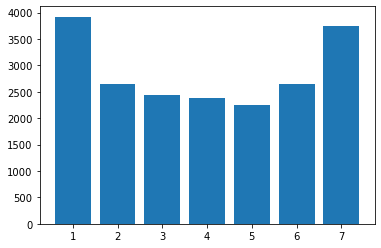

In [19]:
plt.bar(df_dow.index, df_dow['unique_id']);
# 1 Sun, 2 Mon etc

In [20]:
df_month = df.groupby('month').count()
df_month.reset_index(inplace=True)

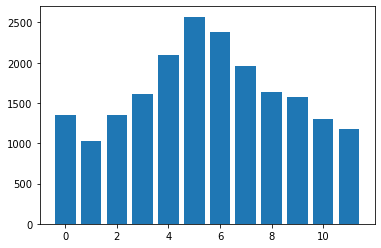

In [21]:
plt.bar(df_month.index, df_month['unique_id']);

In [22]:
df_month_year = df.groupby('month_year').count()
df_month_year.reset_index(inplace=True)

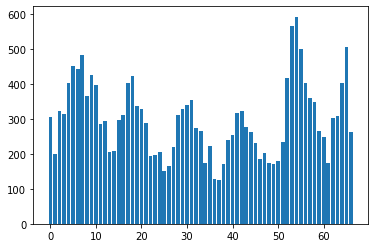

In [23]:
plt.bar(df_month_year.index, df_month_year['unique_id']);

In [24]:
def cat_encoder(category, enc_df):
    ohe = OneHotEncoder(handle_unknown='error', sparse=False)
    
    # 
    temp_df = enc_df[[category]]
    ohe.fit(temp_df)

    cat_encoded = pd.DataFrame(ohe.transform(temp_df).astype(int), \
                               columns=(category+'_'+ohe.categories_[0]))
    return cat_encoded

In [25]:
df['primary_type'].replace(['NON-SHOOTING HOMICIDE', 'FATAL SHOOTING'], 'fatal', inplace=True)
df['primary_type'].replace(['NON-FATAL SHOOTING'], 'non_fatal', inplace=True)

In [26]:
df = df[df['date'] < '2020-01-01']

In [27]:
df.reset_index(inplace=True)

In [28]:
model_vars = ['date', 'primary_type', 'day_of_week']
model_df = df[model_vars]
model_df = model_df.astype(str)

In [29]:
need_enc = list(model_df.columns[1:])

In [30]:
for col in need_enc:
    loop_df = cat_encoder(str(col), model_df)
    model_df = pd.concat([model_df, loop_df], axis=1)

In [31]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13618 entries, 0 to 13617
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    13618 non-null  object
 1   primary_type            13618 non-null  object
 2   day_of_week             13618 non-null  object
 3   primary_type_fatal      13618 non-null  int64 
 4   primary_type_non_fatal  13618 non-null  int64 
 5   day_of_week_1           13618 non-null  int64 
 6   day_of_week_2           13618 non-null  int64 
 7   day_of_week_3           13618 non-null  int64 
 8   day_of_week_4           13618 non-null  int64 
 9   day_of_week_5           13618 non-null  int64 
 10  day_of_week_6           13618 non-null  int64 
 11  day_of_week_7           13618 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 1.2+ MB


In [32]:
model_df

,date,primary_type,day_of_week,primary_type_fatal,primary_type_non_fatal,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
0,2016-01-01,fatal,6,1,0,0,0,0,0,0,1,0
1,2016-01-01,fatal,6,1,0,0,0,0,0,0,1,0
2,2016-01-01,fatal,6,1,0,0,0,0,0,0,1,0
3,2016-01-02,fatal,7,1,0,0,0,0,0,0,0,1
4,2016-01-04,fatal,2,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13613,2018-01-21,non_fatal,1,0,1,1,0,0,0,0,0,0
13614,2017-06-17,fatal,7,1,0,0,0,0,0,0,0,1
13615,2016-09-15,non_fatal,5,0,1,0,0,0,0,1,0,0
13616,2017-07-07,non_fatal,6,0,1,0,0,0,0,0,1,0


In [33]:
model_df = model_df.groupby('date').sum()

In [34]:
def binary_maker(num):
    if num > 0:
        return 1
    else:
        return 0

In [35]:
for col in model_df.columns:
    if 'day' in col or 'month' in col:
        model_df[col] = model_df[col].map(binary_maker)

In [36]:
target = model_df['primary_type_fatal'] + model_df['primary_type_non_fatal'][1:]
target

date
2016-01-01     NaN
2016-01-02     9.0
2016-01-03    12.0
2016-01-04     6.0
2016-01-05    13.0
              ... 
2019-12-27    11.0
2019-12-28    10.0
2019-12-29     8.0
2019-12-30     5.0
2019-12-31     8.0
Length: 1458, dtype: float64

In [37]:
# target = model_df['so_yes_no_yes'] + model_df['so_yes_no_no'][1:]
# target

In [38]:
time_list = []
count_list = []

for col in model_df.columns:
    if 'day' in col or 'month' in col:
        time_list.append(col)
    else:
        count_list.append(col)
        
time_df = model_df[time_list]

In [39]:
for col in time_df:
    time_df[col] = time_df[col].map(binary_maker)

time_df = time_df[2:]

<ipython-input-39-fd6de9be08b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df[col] = time_df[col].map(binary_maker)


In [40]:
# model_df.set_index('date', inplace=True)
model_df = model_df[count_list]
model_df = model_df.rolling(window=2).sum()
model_df = model_df[2:]
model_df = pd.concat([model_df, time_df], axis=1)

In [41]:
# model_df.drop('month_1', axis=1, inplace=True)
model_df.drop('day_of_week_7', axis=1, inplace=True)

In [42]:
model = LinearRegression()

X = model_df
y = target[2:]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

model.fit(X_train, y_train)

LinearRegression()

In [44]:
model.score(X_train, y_train)

0.7324149586106203

In [45]:
model.score(X_test, y_test)

0.693183448939763

In [46]:
sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     395.2
Date:                Fri, 23 Jul 2021   Prob (F-statistic):          4.94e-324
Time:                        13:32:54   Log-Likelihood:                -2879.9
No. Observations:                1164   AIC:                             5778.
Df Residuals:                    1155   BIC:                             5823.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.7726      0.305      5.807      0.000       1.174       2.372
primary_type_fatal         0.4768      0.040     11.801      0.000       0.398       0.556
primary_type_non_fatal     0.5092      0.012     41.180      0.000       0.485       0.534
day_of_week_1             -1.5784      0.315     -5.007      0.000      -2.197      -0.960
day_of_week_2             -3.7337      0.317    -11.769      0.000      -4.356      -3.111
day_of_week_3             -2.0904      0.322     -6.497      0.000      -2.722      -1.459
day_of_week_4             -1.9606      0.319     -6.152      0.000      -2.586      -1.335
day_of_week_5             -1.9980      0.311     -6.420      0.000      -2.609      -1.387
day_of_week_6             -1.1750      0.312     -3.767      0.000      -1.787      -0.563
==============================================================================
Omnibus:                       46.822   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.159
Skew:                          -0.040   Prob(JB):                     4.47e-30
Kurtosis:                       4.667   Cond. No.                         132.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=.25, random_state=0)

model_for_rfecv = LinearRegression()

selector = RFECV(model_for_rfecv, cv=splitter)
selector.fit(X_train, y_train)

print('Column selected?')
for idx, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[idx]}")

Column selected?
primary_type_fatal: True
primary_type_non_fatal: True
day_of_week_1: True
day_of_week_2: True
day_of_week_3: True
day_of_week_4: True
day_of_week_5: True
day_of_week_6: True


In [48]:
tree_model = DecisionTreeRegressor()

tree_model.fit(X_train, y_train)
tree_model.score(X_train, y_train)

0.9343836462076053

In [49]:
tree_model.score(X_test, y_test)

0.5591087926329021

In [89]:
# Different Hyperparameters
param_grid = {'learning_rate': [.1, .01, .001]}

In [90]:
dt = DecisionTreeRegressor()

In [91]:
gridsearch = GridSearchCV(estimator=dt,
                         param_grid=param_grid,
                         scoring='r2',
                         cv=5)

In [92]:
gridsearch.fit(X_train, y_train)

gridsearch.score(X_test, y_test)

ValueError: Invalid parameter learning_rate for estimator DecisionTreeRegressor(). Check the list of available parameters with `estimator.get_params().keys()`.

In [93]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])